In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import humanize

In [13]:
sns.set_style('darkgrid')

In [8]:
apartments = pd.read_csv('../data/processed/apartments.csv')
apartments = apartments.loc[apartments['tipo_operacion'] == 'VENTA']
apartments = apartments.drop(['precio_arriendo'], axis=1)
apartments.head()

,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,cerca_estacion_tm
1,2510-M4156145,APARTAMENTO,VENTA,4.850000e+08,84.0,3.0,3.0,680000.0,1.0,SANTA BARBARA,...,0,0,1,1,False,USAQUEN,SAN PATRICIO,Pepe Sierra,1116.77,0
3,10139-M4343016,APARTAMENTO,VENTA,4.950000e+08,77.2,3.0,2.0,367000.0,1.0,COLINA Y ALREDEDORES,...,1,1,1,1,False,SUBA,CAMPOS DE SILENCIO,Calle 161,933.85,0
4,10139-M3692828,APARTAMENTO,VENTA,1.570000e+09,213.0,3.0,4.0,994000.0,3.0,COUNTRY,...,0,1,1,1,False,USAQUEN,GINEBRA,Prado,2769.19,0
5,2456-M3860535,APARTAMENTO,VENTA,7.500000e+08,142.0,3.0,3.0,400000.0,2.0,COLINA Y ALREDEDORES,...,0,1,1,1,False,SUBA,URB. LA SIRENA,Mazurén,1704.02,0
6,3390-M4320821,APARTAMENTO,VENTA,3.900000e+09,432.0,4.0,5.0,3000000.0,4.0,CHICO,...,0,0,1,1,False,CHAPINERO,S.C. EL NOGAL,Héroes,960.91,0


In [9]:
apartments.shape

(15609, 30)

In [10]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15609 entries, 1 to 25256
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   codigo                   15609 non-null  object 
 1   tipo_propiedad           15609 non-null  object 
 2   tipo_operacion           15609 non-null  object 
 3   precio_venta             15609 non-null  float64
 4   area                     15608 non-null  float64
 5   habitaciones             15607 non-null  float64
 6   banos                    15607 non-null  float64
 7   administracion           13906 non-null  float64
 8   parqueaderos             15607 non-null  float64
 9   sector                   14789 non-null  object 
 10  estrato                  15604 non-null  float64
 11  antiguedad               15603 non-null  object 
 12  estado                   15609 non-null  object 
 13  longitud                 15609 non-null  float64
 14  latitud                  15

In [11]:
apartments.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'cerca_estacion_tm'],
      dtype='object')

# Elimindando Outliers

<Axes: xlabel='precio_venta'>

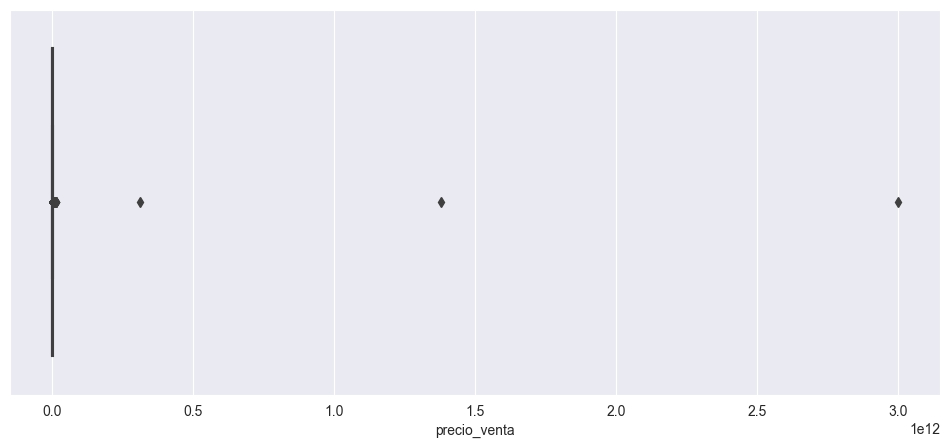

In [15]:
plt.figure(figsize=(12, 5))

sns.boxplot(x='precio_venta', data=apartments)

In [17]:
Q1 = apartments['precio_venta'].quantile(0.25)
Q3 = apartments['precio_venta'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = apartments.loc[(apartments['precio_venta'] < lower) | (apartments['precio_venta'] > upper)]
outliers.shape

(1104, 30)

In [21]:
apartments = apartments[(apartments['precio_venta'] > lower) & (apartments['precio_venta'] < upper)]
apartments.shape

(14505, 30)

# Analisis Univariado

## Precio de Venta

In [31]:
apartments['precio_venta'].describe().apply(lambda x: humanize.intcomma(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,"14,505.0","763,194,139.6594278","525,673,185.53410107","245,000.0","372,000,000.0","590,000,000.0","1,020,000,000.0","2,411,000,000.0"


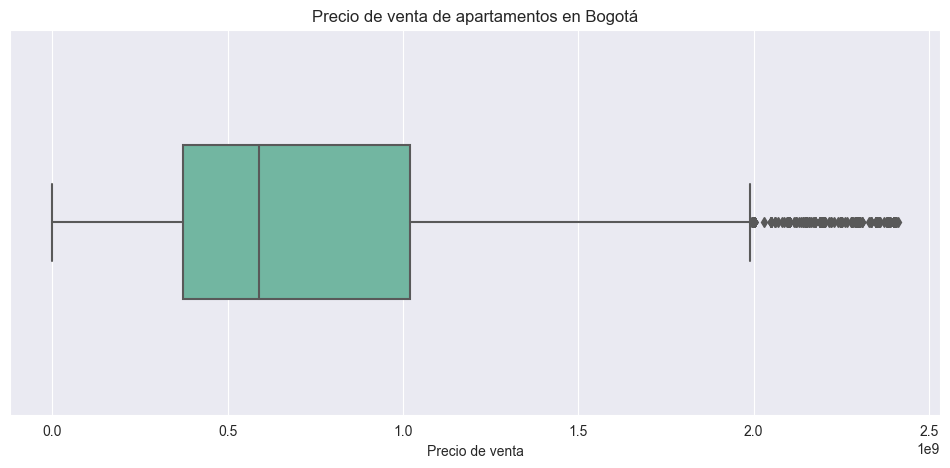

In [40]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    apartments,
    x='precio_venta',
    width=.4,
    palette='Set2'
)

plt.title('Precio de venta de apartamentos en Bogotá')
plt.xlabel('Precio de venta')
plt.show()

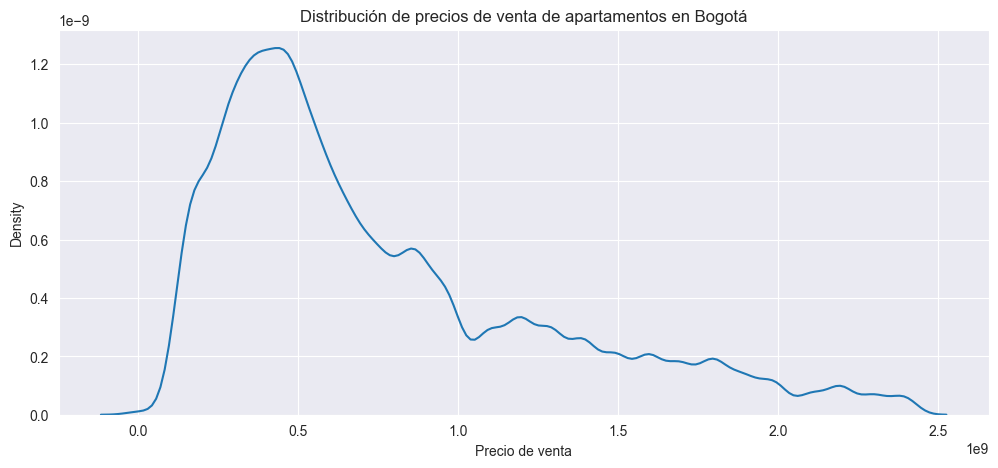

In [43]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    apartments,
    x='precio_venta',
    bw_adjust=.5,
)

plt.title('Distribución de precios de venta de apartamentos en Bogotá')
plt.xlabel('Precio de venta')
plt.show()

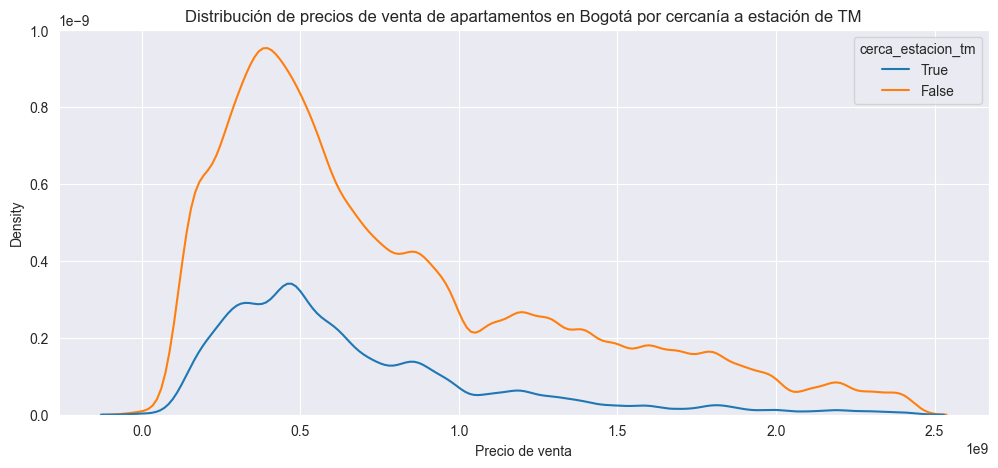

In [47]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    apartments,
    x='precio_venta',
    hue='cerca_estacion_tm',
    bw_adjust=.5,
    hue_order=[True, False],
)

plt.title('Distribución de precios de venta de apartamentos en Bogotá por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.show()

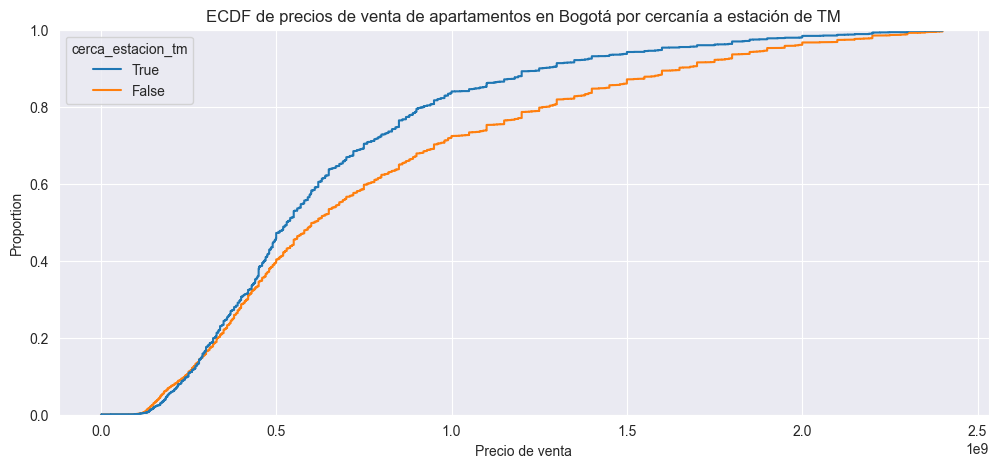

In [49]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    apartments,
    x='precio_venta',
    hue='cerca_estacion_tm',
    hue_order=[True, False],
)

plt.title('ECDF de precios de venta de apartamentos en Bogotá por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.show()